# Pelota que cae
Las ecuaciones de Newton son:
$m \frac{d^2\vec r }{dt^2} = -g \hat k + \vec f_{fricc}+ \vec f_{ext}$

In [30]:
from pylab import*
from scipy.integrate import*
%matplotlib inline

In [43]:
 def fuerza (v_r,t,gama=0,viento=[0,0],m=1,g=9.8):
    #v_r=[ry,rz,vy,vz]
    dvz = -g/m-(gama/m)*v_r[3]+viento[1]
    dvy = -(gama/m)*v_r[2]+viento[0]
    drz = v_r[3]
    dry =v_r[2]
    return [dry,drz,dvy,dvz]

In [4]:
tiempo = linspace(0,1)
s_ideal= odeint(fuerza,[0,0,1,5],tiempo)
y_id,z_id = s_ideal[:,0],s_ideal[:,1]
s_fric = odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,))
y_f,z_f= s_fric[:,0],s_fric[:,1]
s_f_v= odeint(fuerza[0,0,1,5],tiempo,args=(0.5,[-3.5,0],))
y_f_v,z_f_v= s_f_v[:,0],s_v[:,1]
plot(y_id,z_id,y_f,z_f,y_f_v,z_f_v)
xlim
show ()

TypeError: 'function' object has no attribute '__getitem__'

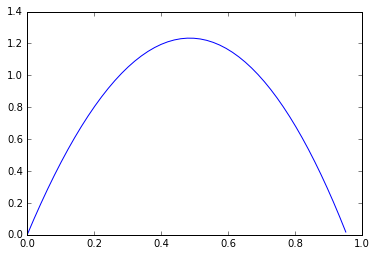

In [41]:
tiempo = linspace(0,1)
resultado = odeint(fuerza,[0,0,1,5],tiemp,args=[0.1,o)
y,z,vy,vz = resultado[:,0],resultado[:,1],resultado[:,2],resultado[:,3]
plot(y,z)
show ()

In [15]:
lista= [1,2,3,523,154,1646,13,354]
print lista
print lista[1:4]

[1, 2, 3, 523, 154, 1646, 13, 354]
[2, 3, 523]


In [13]:
def funcion1(x,y,otra_funcion):
    salida = otra_funcion(x)+y
    return salida
def funcion2(x):
    salida = x**2
    return salida
def funcion3(x):
    salida= x**3
    return salida

In [14]:
print funcion2(4.)
print funcion3(4.)
print funcion1(5.,8,funcion3)

16.0
64.0
133.0


In [36]:
def pedazo_trayectoria(pto_ini,dt=0.1,param=[0,[0,0],1,9.8]):
    tiempo= array([0,dt])
    sol = odeint(fuerza,pto_ini,tiempo,args=(param[0],param[1],param[2],param[3],))
    return sol

In [37]:
pedazo_trayectoria([0,0,1,1])

array([[ 0.   ,  0.   ,  1.   ,  1.   ],
       [ 0.1  ,  0.051,  1.   ,  0.02 ]])

In [83]:
def rebote(punto,dt,param):
    error= 1e-5
    dt=dt/2
    sol =odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
    while abs(sol[:,1][0]-sol[:,1][1])> error:
        if sol[:,1][0]*sol[:,1][1]<0:
            punto=sol[0]
        else:
            punto=sol[1]
        dt=dt/2
        sol =odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
        print sol[0]        
    return [sol[0][0],sol[0][1],sol[0][2],-sol[0][3]]

In [89]:
def trayectoria (pto_ini,t_fin,param=[0,[0,0],1,9.8]):
    t_total,dt=[0],0.05
    t_actual=0
    y=[pto_ini[0]]
    z=[pto_ini[1]]
    while t_actual <= t_fin:
        t_actual = t_actual + dt
        sol =odeint(fuerza,pto_ini,[0,dt],args=(param[0],param[1],param[2],param[3],))
        if sol[:,1][0]*sol[:,1][1]<0:
            sol=rebote(sol[0],dt,param)
            y.append(sol[0])
            z.append(sol[1])
            pto_ini=sol
        else:
            y.append(sol[:,0][1])
            z.append(sol[:,1][1]) 
            pto_ini=sol[1]
    return y,z   

[ 0.6    0.036  1.    -2.88 ]
[ 0.6    0.036  1.    -2.88 ]
[ 0.60625     0.01780859  1.         -2.94125   ]
[ 0.609375    0.00856933  1.         -2.971875  ]
[ 0.6109375   0.00391381  1.         -2.9871875 ]
[  6.11718750e-01   1.57708326e-03   1.00000000e+00  -2.99484375e+00]
[  6.12109375e-01   4.06474741e-04   1.00000000e+00  -2.99867188e+00]
[  6.12109375e-01   4.06474741e-04   1.00000000e+00  -2.99867188e+00]
[  6.12207031e-01   1.13588961e-04   1.00000000e+00  -2.99962891e+00]
[  6.12207031e-01   1.13588961e-04   1.00000000e+00  -2.99962891e+00]
[  6.12231445e-01   4.03529124e-05   1.00000000e+00  -2.99986816e+00]
[  6.12243652e-01   3.73269787e-06   1.00000000e+00  -2.99998779e+00]
[  6.12243652e-01   3.73269787e-06   1.00000000e+00  -2.99998779e+00]


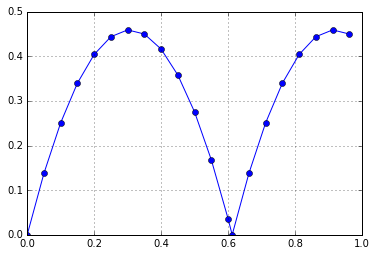

In [90]:
y,z= trayectoria([0,0,1,3],1)
plot(y,z,'o-') 
grid (True)

In [82]:
rebote([ 0.6,0.036,1.,-2.88],0.05,[0,[0,0],1,9.8])

[ 0.6    0.036  1.    -2.88 ]
[ 0.6    0.036  1.    -2.88 ]
[ 0.60625     0.01780859  1.         -2.94125   ]
[ 0.609375    0.00856934  1.         -2.971875  ]
[ 0.6109375   0.00391382  1.         -2.9871875 ]
[  6.11718750e-01   1.57708739e-03   1.00000000e+00  -2.99484375e+00]
[  6.12109375e-01   4.06478874e-04   1.00000000e+00  -2.99867188e+00]
[  6.12109375e-01   4.06478874e-04   1.00000000e+00  -2.99867188e+00]
[  6.12207031e-01   1.13593094e-04   1.00000000e+00  -2.99962891e+00]
[  6.12207031e-01   1.13593094e-04   1.00000000e+00  -2.99962891e+00]
[  6.12231445e-01   4.03570457e-05   1.00000000e+00  -2.99986816e+00]
[  6.12243652e-01   3.73683110e-06   1.00000000e+00  -2.99998779e+00]
[  6.12243652e-01   3.73683110e-06   1.00000000e+00  -2.99998779e+00]


([0.61224365234374989, 3.7368311003308554e-06, 1.0, 2.9999877929687497],)